# Student Grade Prediction using Logistic Regression
## Jeffery Tse

In [27]:
# import statements
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
%matplotlib inline

In [32]:
# https://www.kaggle.com/dipam7/student-grade-prediction
# P. Cortez and A. Silva. Using Data Mining to Predict Secondary School Student Performance. In A. Brito and J. Teixeira Eds., Proceedings of 5th FUture BUsiness TEChnology Conference (FUBUTEC 2008) pp. 5-12, Porto, Portugal, April, 2008, EUROSIS, ISBN 978-9077381-39-7.
df = pd.read_csv('./student-mat.csv', low_memory=False)

In [33]:

df.drop(columns=['school','address','Mjob','Fjob','reason'], inplace=True)
for i in df.index:
    df.loc[i,"sex"] = 0 if df.loc[i,"sex"] == "F" else 1
    df.loc[i,"famsize"] = 0 if df.loc[i,"famsize"] == 'LT3' else 1
    df.loc[i,'Pstatus'] = 0 if df.loc[i,'Pstatus'] == 'A' else 1
    df.loc[i,'guardian'] = 0 if df.loc[i,'guardian'] == 'mother' else 1 if df.loc[i,'guardian'] == 'father' else 2
    df.loc[i,"schoolsup"] = 0 if df.loc[i,"schoolsup"] == 'no' else 1
    df.loc[i,"famsup"] = 0 if df.loc[i,"famsup"] == 'no' else 1
    df.loc[i,"paid"] = 0 if df.loc[i,"paid"] == 'no' else 1
    df.loc[i,"activities"] = 0 if df.loc[i,"activities"] == 'no' else 1
    df.loc[i,"nursery"] = 0 if df.loc[i,"nursery"] == 'no' else 1
    df.loc[i,"higher"] = 0 if df.loc[i,"higher"] == 'no' else 1
    df.loc[i,"internet"] = 0 if df.loc[i,"internet"] == 'no' else 1
    df.loc[i,"romantic"] = 0 if df.loc[i,"romantic"] == 'no' else 1
# df = pd.get_dummies(df)

out = np.where(df['G3'] > 13, 1, 0) # greater than 65% is passing
inp = df.drop(['G3'], axis=1)

# print(df.columns)
# print(out)

In [76]:
def test(X_train, X_test, y_train, y_test, solver, penalty):
    log_reg = LogisticRegression(max_iter=1000, solver=solver, penalty=penalty)
    log_reg.fit(X_train, y_train)
    y_pred = log_reg.predict(X_test)
    
    x
    
    print(classification_report(y_test, y_pred))
    print(f"\tTraining Accuracy = {log_reg.score(X_train, y_train)}")
    print(f"\tTesting Accuracy = {log_reg.score(X_test, y_test)}")

No regularization
              precision    recall  f1-score   support

           0       0.94      0.94      0.94        54
           1       0.88      0.88      0.88        25

    accuracy                           0.92        79
   macro avg       0.91      0.91      0.91        79
weighted avg       0.92      0.92      0.92        79

	Training Accuracy = 1.0
	Testing Accuracy = 0.9240506329113924
L1 regularization
              precision    recall  f1-score   support

           0       0.91      0.94      0.93        54
           1       0.87      0.80      0.83        25

    accuracy                           0.90        79
   macro avg       0.89      0.87      0.88        79
weighted avg       0.90      0.90      0.90        79

	Training Accuracy = 0.9683544303797469
	Testing Accuracy = 0.8987341772151899
L2 regularization
              precision    recall  f1-score   support

           0       0.95      0.98      0.96        54
           1       0.96      0.88      0

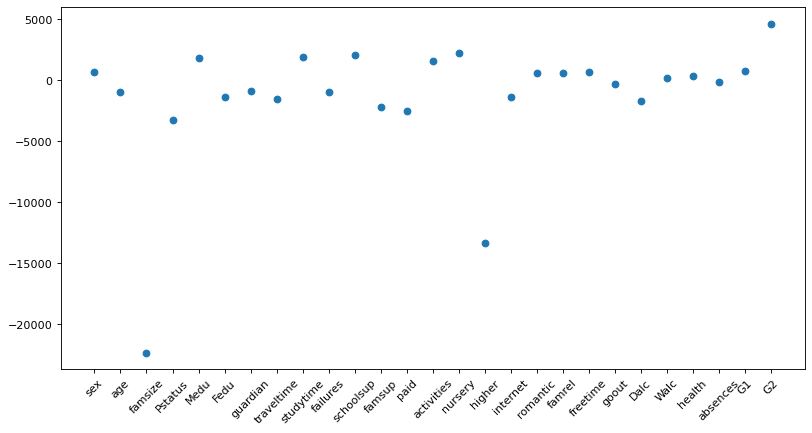

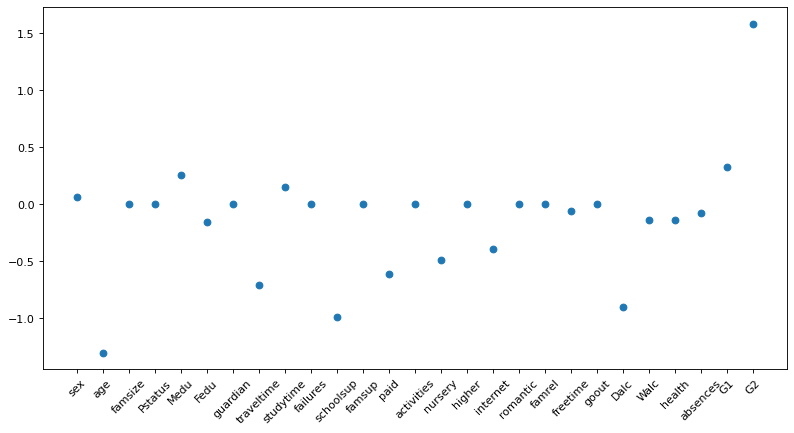

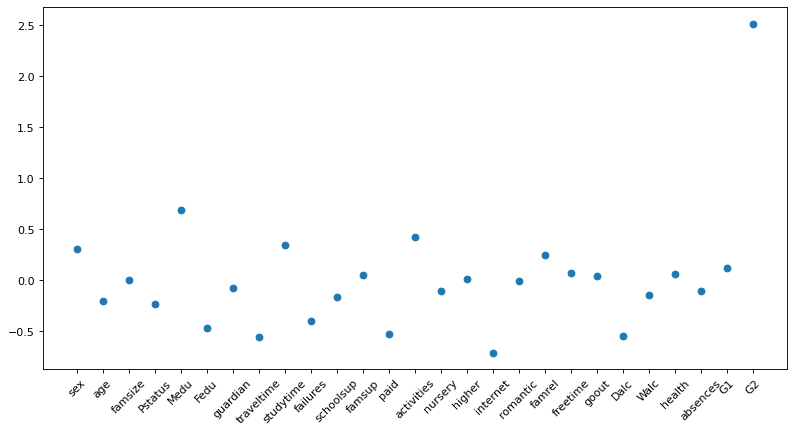

In [77]:
X_train, X_test, y_train, y_test = train_test_split(inp, out, test_size=.2)

print("No regularization")
test(X_train, X_test, y_train, y_test, "lbfgs", "none")
print("L1 regularization")
test(X_train, X_test, y_train, y_test, "liblinear", "l1")
print("L2 regularization")
test(X_train, X_test, y_train, y_test, "lbfgs", "l2")